# Spectral Clustering

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

array([[1, 1],
       [2, 1],
       [1, 0],
       [4, 7],
       [3, 5],
       [3, 6]])

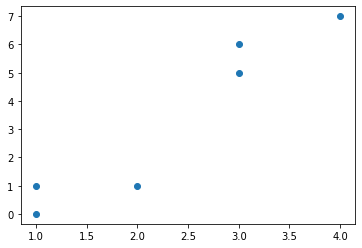

In [11]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
X
plt.scatter(X[:,0], X[:,1])

In [9]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)
        
clustering.labels_

array([1, 1, 1, 0, 0, 0])

In [19]:
clustering.fit_predict(X)

array([1, 1, 1, 0, 0, 0])

# sklearn.cluster.SpectralCoclustering
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralCoclustering.html

In [25]:
from sklearn.cluster import SpectralCoclustering

clustering = SpectralCoclustering(n_clusters=2, random_state=0).fit(X)
X

array([[1, 1],
       [2, 1],
       [1, 0],
       [4, 7],
       [3, 5],
       [3, 6]])

array([0, 1, 1, 0, 0, 0], dtype=int32)

array([0, 0], dtype=int32)

In [26]:
clustering.row_labels_ 
clustering.column_labels_ 

array([0, 1, 1, 0, 0, 0], dtype=int32)

array([0, 0], dtype=int32)

Convenient way to get row and column indicators together.
Returns the ``rows_`` and ``columns_`` members.

In [37]:
rows, columns = clustering.biclusters_
rows
rows[0, :]

array([[ True, False, False,  True,  True,  True],
       [False,  True,  True, False, False, False]])

array([ True, False, False,  True,  True,  True])

In [30]:
columns

array([[ True,  True],
       [False, False]])

In [39]:
pd.DataFrame(X, index=rows[0, :], columns=columns[0, :])
pd.DataFrame(X, index=rows[1, :], columns=columns[1, :])

,True,True
True,1,1
False,2,1
False,1,0
True,4,7
True,3,5
True,3,6


,False,False
False,1,1
True,2,1
True,1,0
False,4,7
False,3,5
False,3,6


# A demo of the Spectral Co-Clustering algorithm
- https://scikit-learn.org/stable/auto_examples/bicluster/plot_spectral_coclustering.html#sphx-glr-auto-examples-bicluster-plot-spectral-coclustering-py

Text(0.5, 1.05, 'Original dataset')

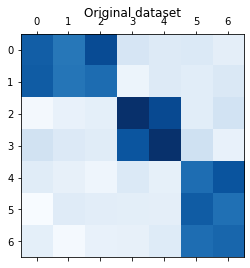

In [62]:
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(7, 7), n_clusters=3, noise=5, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

In [63]:
data = data.astype('int')
data

array([[65, 56, 72,  5,  2,  2,  0],
       [66, 57, 60, -4,  1,  0,  3],
       [-7, -2, -1, 81, 72,  0,  7],
       [ 7,  2,  0, 68, 81,  8, -2],
       [ 0, -2, -5,  3, -1, 60, 69],
       [-9,  1,  0,  0,  0, 66, 59],
       [-1, -8, -3, -2,  1, 60, 62]])

각 그룹에 행/열이 속하는지 여부

In [66]:
rows
print('\n')
columns

array([[ True,  True, False, False, False, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False, False, False,  True,  True,  True]])

array([[ True,  True,  True, False, False, False, False],
       [False, False, False,  True,  True, False, False],
       [False, False, False, False, False,  True,  True]])

In [67]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]
data

array([[-8, -1, 62, -2,  1, -3, 60],
       [-2, -7,  7, 81, 72, -1,  0],
       [57, 66,  3, -4,  1, 60,  0],
       [ 2,  7, -2, 68, 81,  0,  8],
       [56, 65,  0,  5,  2, 72,  2],
       [ 1, -9, 59,  0,  0,  0, 66],
       [-2,  0, 69,  3, -1, -5, 60]])

In [69]:
row_idx
col_idx

array([6, 2, 1, 3, 0, 5, 4])

array([1, 0, 6, 3, 4, 2, 5])

Text(0.5, 1.05, 'Shuffled dataset')

SpectralCoclustering(random_state=0)

Text(0.5, 1.05, 'After biclustering; rearranged to show biclusters')

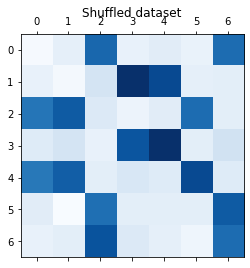

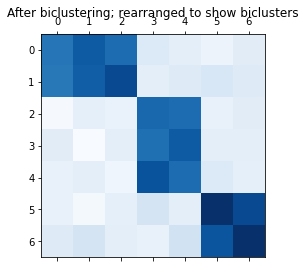

In [77]:
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=3, random_state=0)
model.fit(data)

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

# 원래 자료와 클러스터링 예측 자료의 indicator 비교(consensus_score)

In [80]:
cluster_rows, cluster_colums = model.biclusters_
cluster_rows, cluster_colums

(array([[False, False,  True, False,  True, False, False],
        [ True, False, False, False, False,  True,  True],
        [False,  True, False,  True, False, False, False]]),
 array([[ True,  True, False, False, False,  True, False],
        [False, False,  True, False, False, False,  True],
        [False, False, False,  True,  True, False, False]]))

In [81]:
rows
columns

array([[ True,  True, False, False, False, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False, False, False,  True,  True,  True]])

array([[ True,  True,  True, False, False, False, False],
       [False, False, False,  True,  True, False, False],
       [False, False, False, False, False,  True,  True]])

In [47]:
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))
print("consensus score: {:.3f}".format(score))

consensus score: 0.648


In [72]:
model.row_labels_

array([0, 2, 1, 3, 1, 0, 0], dtype=int32)

In [48]:
garo, sero = model.biclusters_
garo
sero

array([[False, False,  True, ..., False,  True, False],
       [ True,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False,  True]])

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False,  True],
       [False,  True,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

In [49]:
print(f"consensus score: {consensus_score(model.biclusters_, (garo, sero)):.3f}")

consensus score: 1.000


# End